In [1]:
import pandas as pd
import json

In [11]:
result_path = '/Users/florianwicher/Desktop/resultData/Leakage/LSTM_result.parquet.gzip'

Data = pd.read_parquet(result_path)

Data['folder_id'] = Data['scenario'].str.split('_').str[0]
Data['scenario_id'] = Data['scenario'].str.split('_').str[1]
Data = Data.drop(['scenario'],axis=1)
Data

,detection_delay,tp,fp,fn,tn,folder_id,scenario_id
0,0,1.0,0.0,0.000000,1.000000,0,100
1,0,1.0,0.0,0.000000,1.000000,0,101
2,0,1.0,0.0,0.000000,1.000000,0,102
3,0,1.0,0.0,0.241573,0.758427,0,103
4,0,1.0,0.0,0.047724,0.952276,0,104
...,...,...,...,...,...,...,...
2875,0,1.0,0.0,0.000000,1.000000,5,96
2876,0,1.0,0.0,0.007467,0.992533,5,97
2877,0,1.0,0.0,0.000347,0.999653,5,98
2878,0,1.0,0.0,0.000000,1.000000,5,99


In [12]:
print("MEAN", round(Data.tn.mean(),3))
print("MEDIAN", round(Data.tn.median(),3))
print("MIN", round(Data.tn.min(),3))
print("MAX", round(Data.tn.max(),3))
print("VAR", round(Data.tn.var(),3))

MEAN 0.987
MEDIAN 1.0
MIN 0.646
MAX 1.0
VAR 0.002


In [125]:
with open('sensor_fault_types.json') as json_file:
        store = json.load(json_file)
        
store

{'drift': [{'folder_id': '0', 'scenario_id': '112'},
  {'folder_id': '0', 'scenario_id': '67'},
  {'folder_id': '0', 'scenario_id': '122'},
  {'folder_id': '0', 'scenario_id': '32'},
  {'folder_id': '0', 'scenario_id': '57'},
  {'folder_id': '0', 'scenario_id': '92'},
  {'folder_id': '0', 'scenario_id': '2'},
  {'folder_id': '0', 'scenario_id': '72'},
  {'folder_id': '0', 'scenario_id': '107'},
  {'folder_id': '0', 'scenario_id': '17'},
  {'folder_id': '0', 'scenario_id': '87'},
  {'folder_id': '0', 'scenario_id': '42'},
  {'folder_id': '0', 'scenario_id': '137'},
  {'folder_id': '0', 'scenario_id': '27'},
  {'folder_id': '0', 'scenario_id': '7'},
  {'folder_id': '0', 'scenario_id': '97'},
  {'folder_id': '0', 'scenario_id': '52'},
  {'folder_id': '0', 'scenario_id': '142'},
  {'folder_id': '0', 'scenario_id': '37'},
  {'folder_id': '0', 'scenario_id': '127'},
  {'folder_id': '0', 'scenario_id': '62'},
  {'folder_id': '0', 'scenario_id': '117'},
  {'folder_id': '0', 'scenario_id': '22'

In [126]:
data = []
for key, values in store.items():
    for entry in values:
        entry['key'] = key
        data.append(entry)

df = pd.DataFrame(data)
df

,folder_id,scenario_id,key
0,0,112,drift
1,0,67,drift
2,0,122,drift
3,0,32,drift
4,0,57,drift
...,...,...,...
865,5,36,constant
866,5,76,constant
867,5,71,constant
868,5,41,constant


In [127]:
# Funktion zum Eintragen des Keys in die dritte Spalte basierend auf 'folder_id' und 's_id'
def eintrag_key(row):
    for key, values in store.items():
        for entry in values:
            if entry['folder_id'] == row['folder_id'] and entry['scenario_id'] == row['scenario_id']:
                return key
    return None  # Wenn kein übereinstimmender Key gefunden wurde

# Die Funktion auf jede Zeile des DataFrames anwenden
Data['key'] = Data.apply(eintrag_key, axis=1)

# Anzeigen des aktualisierten DataFrames


In [128]:
Data

,detection_delay,tp,fp,fn,tn,folder_id,scenario_id,key
0,1,1.0,0.0,0.000116,0.999884,0,100,stuckzero
1,1,1.0,0.0,0.000116,0.999884,0,101,constant
2,4,1.0,0.0,0.000463,0.999537,0,102,drift
3,1,1.0,0.0,0.227606,0.772394,0,103,normal
4,1,1.0,0.0,0.000116,0.999884,0,104,percentage
...,...,...,...,...,...,...,...,...
865,1,1.0,0.0,0.000116,0.999884,5,96,constant
866,5,1.0,0.0,0.000578,0.999422,5,97,drift
867,1,1.0,0.0,0.226638,0.773362,5,98,normal
868,1,1.0,0.0,0.000116,0.999884,5,99,percentage


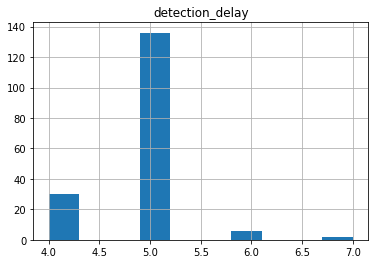

In [129]:
df_drift = Data[Data['key']=='drift']
df_drift.hist('detection_delay');

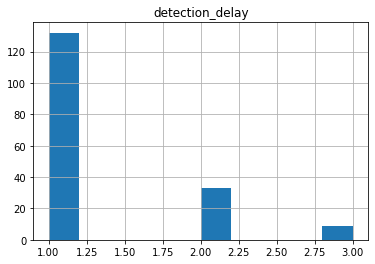

In [130]:
df_normal = Data[Data['key']=='normal']
df_normal.hist('detection_delay');

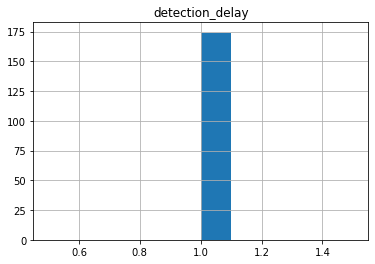

In [131]:
df_percentage = Data[Data['key']=='percentage']
df_percentage.hist('detection_delay');

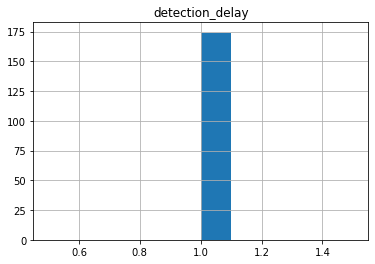

In [132]:
df_constant = Data[Data['key']=='constant']
df_constant.hist('detection_delay');

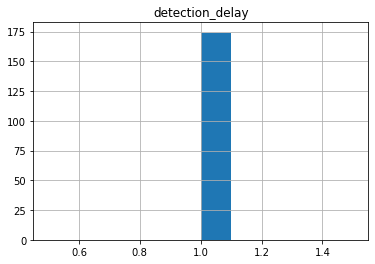

In [133]:
df_stuck_zero = Data[Data['key']=='stuckzero']
df_stuck_zero.hist('detection_delay');

In [134]:
dfs = [df_constant, df_drift, df_normal, df_percentage, df_stuck_zero]
df_names = ['df_constant', 'df_drift', 'df_normal', 'df_percentage', 'df_stuck_zero']

for i in range(len(dfs)):
    print(f"{df_names[i]} tn mean: {dfs[i].tn.mean()}")
    print(f"{df_names[i]} tn median: {dfs[i].tn.median()}")
    print(f"{df_names[i]} tn min: {dfs[i].tn.min()}")
    print(f"{df_names[i]} tn max: {dfs[i].tn.max()}")
    print(f"{df_names[i]} tn var: {dfs[i].tn.var()}")
    print(" ")
    
for i in range(len(dfs)):
    print(f"{df_names[i]} detection_delay mean: {dfs[i].detection_delay.mean()}")
    print(f"{df_names[i]} detection_delay median: {dfs[i].detection_delay.median()}")
    print(f"{df_names[i]} detection_delay min: {dfs[i].detection_delay.min()}")
    print(f"{df_names[i]} detection_delay max: {dfs[i].detection_delay.max()}")
    print(f"{df_names[i]} detection_delay var: {dfs[i].detection_delay.var()}")
    print(" ")

df_constant tn mean: 0.9998842726536266
df_constant tn median: 0.999884272653628
df_constant tn min: 0.999884272653628
df_constant tn max: 0.999884272653628
df_constant tn var: 2.0951267863917156e-30
 
df_drift tn mean: 0.9994349225314155
df_drift tn median: 0.9994216310005783
df_drift tn min: 0.999190470683474
df_drift tn max: 0.999537251272559
df_drift tn var: 3.2216364724981804e-09
 
df_normal tn mean: 0.7920882381114506
df_normal tn median: 0.7960565733022898
df_normal tn min: 0.7652790079716564
df_normal tn max: 0.8156329651656754
df_normal tn var: 0.00017026394037203358
 
df_percentage tn mean: 0.9960081271870055
df_percentage tn median: 0.999884272653628
df_percentage tn min: 0.8348632718137018
df_percentage tn max: 0.999884272653628
df_percentage tn var: 0.0005320750189869323
 
df_stuck_zero tn mean: 0.9998842726536266
df_stuck_zero tn median: 0.999884272653628
df_stuck_zero tn min: 0.999884272653628
df_stuck_zero tn max: 0.999884272653628
df_stuck_zero tn var: 2.09512678639171

# Plot Time Series with different Fault Types